# Лабораторная яработа 2. Подготовка исходных данных

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Создать датафрейм вставить в негго пропущенные значения

In [2]:
df=pd.DataFrame(np.random.rand(1000, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.629084,0.461039,0.796415,0.694329
1,0.056633,0.073639,0.976549,0.032116
2,0.907326,0.737540,0.231468,0.827432
3,0.222677,0.043634,0.353213,0.208231
4,0.827523,0.124034,0.634093,0.706020
...,...,...,...,...
995,0.874092,0.611661,0.227636,0.735238
996,0.567611,0.827455,0.042101,0.388884
997,0.904178,0.492866,0.263354,0.004579
998,0.271659,0.774527,0.528367,0.624659


In [3]:
# Будем работать с копией датафрейма
df1=df.copy()

In [4]:
# вставим пропущенные занчения для этого будем использовать срез по строкам

df1[45 : 161] = np.nan

In [5]:
# Проверим вставились ли у нас пропущенные значения
df1.isna().mean()

A    0.116
B    0.116
C    0.116
D    0.116
dtype: float64

Как видим пропущенных значений в датафрейме около 11.6%

### задание 2. замена пропущенных значений

### Метод fillna

In [6]:
# Заменим значения трех столбцов средним, медианой и нулем
df1 = df1.fillna(value={'A': df['A'].mean(), 
                       'B': df['B'].median(),
                       'D': 0})


In [7]:
# Заменим значения в столбце D не пропущенными предудущими значениями
df1 = df1.fillna(method='ffill')

#### Проверим все ли у нас заменилось

In [8]:
df1[45: 161]

,A,B,C,D
45,0.503227,0.508786,0.9965,0.0
46,0.503227,0.508786,0.9965,0.0
47,0.503227,0.508786,0.9965,0.0
48,0.503227,0.508786,0.9965,0.0
49,0.503227,0.508786,0.9965,0.0
...,...,...,...,...
156,0.503227,0.508786,0.9965,0.0
157,0.503227,0.508786,0.9965,0.0
158,0.503227,0.508786,0.9965,0.0
159,0.503227,0.508786,0.9965,0.0


### Сгенерировать два числовых набора и добавить в них выбросы

In [9]:
# Cгенерируем два столбца (нормальное распределение) со средним значением 3 и стандартным отклонением 2.5
df2=pd.DataFrame(np.random.normal(3, 2.5, size=(1000, 2)), columns=list('AB'))
df2

,A,B
0,2.185248,6.149427
1,1.374479,1.178976
2,6.427988,1.754329
3,1.386972,6.875243
4,1.224998,8.617782
...,...,...
995,3.625453,4.381904
996,2.331467,1.624949
997,7.021160,1.881546
998,7.388037,7.480684


### Построим гистограмы

Text(0.5, 1.0, 'Распределение B')

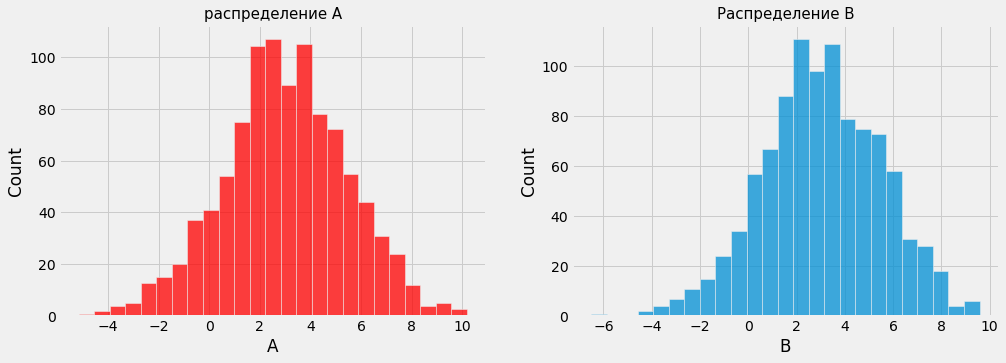

In [10]:
# Посмотрим на распределения столбцов
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Выводим Гистограмму
# столбец А
sns.histplot(df2.A, ax=ax[0], color='red')
ax[0].set_title('распределение A', size=15)

# Столбец B
sns.histplot(df2.B, ax=ax[1])
ax[1].set_title('Распределение B', size=15)


In [11]:
# Добавим выбросы
df2.A[995 : 999] = np.arange(30, 34, 1)
df2.B[990 : 994] = np.arange(35, 39, 1)

### Построим гистограмы с выбросами

C:\Users\eguze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eguze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Распределение B (clean)')

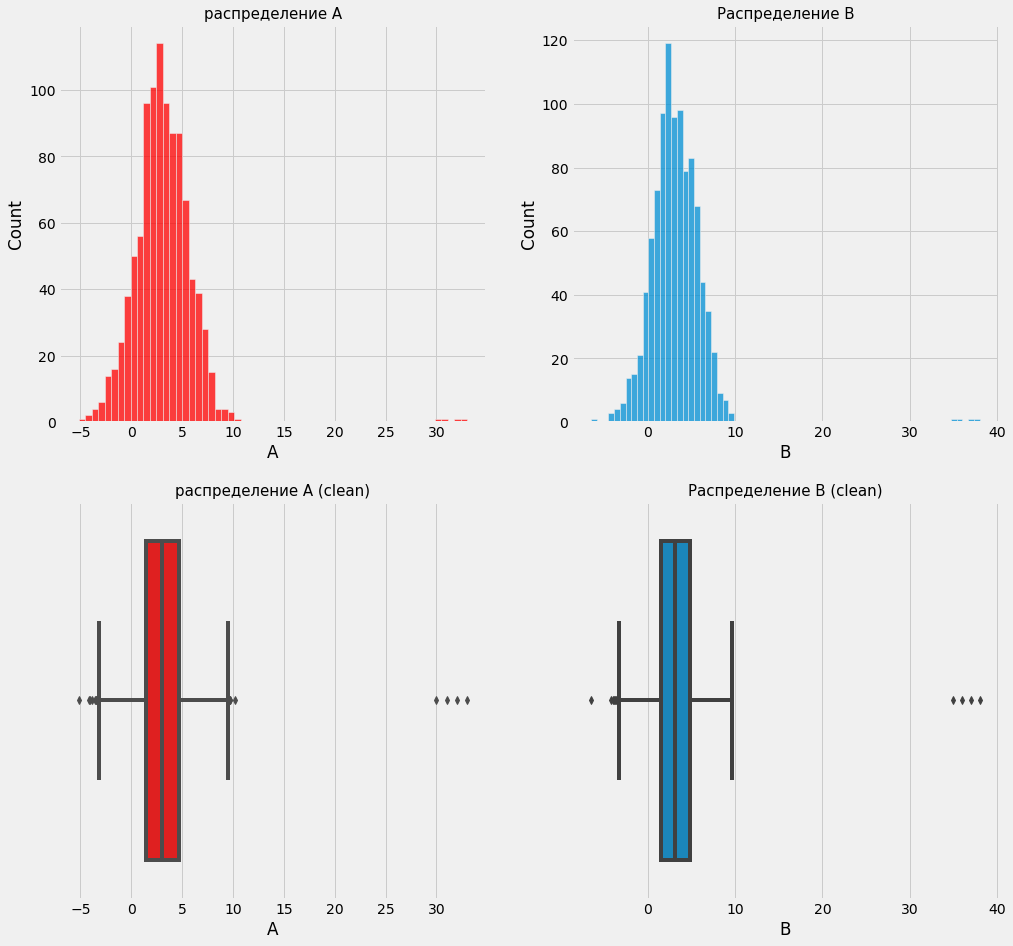

In [12]:
# Посмотрим на распределения столбцов
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

# Выводим Гистограмму
# столбец А
sns.histplot(df2.A, ax=ax[0, 0], color='red')
ax[0, 0].set_title('распределение A', size=15)

# Столбец B
sns.histplot(df2.B, ax=ax[0,1])
ax[0, 1].set_title('Распределение B', size=15)

# Выводим боксплот
sns.boxplot(df2.A, ax=ax[1,0], color='red')
ax[1,0].set_title('распределение A (clean)', size=15)

# Столбец B
sns.boxplot(df2.B, ax=ax[1,1])
ax[1,1].set_title('Распределение B (clean)', size=15)

### Почистим данные от выбросов

### Column A

In [13]:
#Почистим данные от выбросов столбец A
# Наблюдаемое отклонение от среднего
dev1 = (df2.A-df2.A.mean()).abs()
# Стандартное отклонение
std1 = df2.A.std()
# Фильтруем исходный набор данных
df_trimmed1= df2[~(dev1>3*std1)].copy()

### Column B

In [14]:
#Почистим данные от выбросов столбец B
# Наблюдаемое отклонение от среднего
dev2 = (df_trimmed1.B-df_trimmed1.B.mean()).abs()
# Стандартное отклонение
std2 = df_trimmed1.B.std()
# Фильтруем исходный набор данных
df_trimmed2= df_trimmed1[~(dev2>3*std2)].copy()

### Для проверки построим гистограммы

C:\Users\eguze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eguze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Распределение B (clean)')

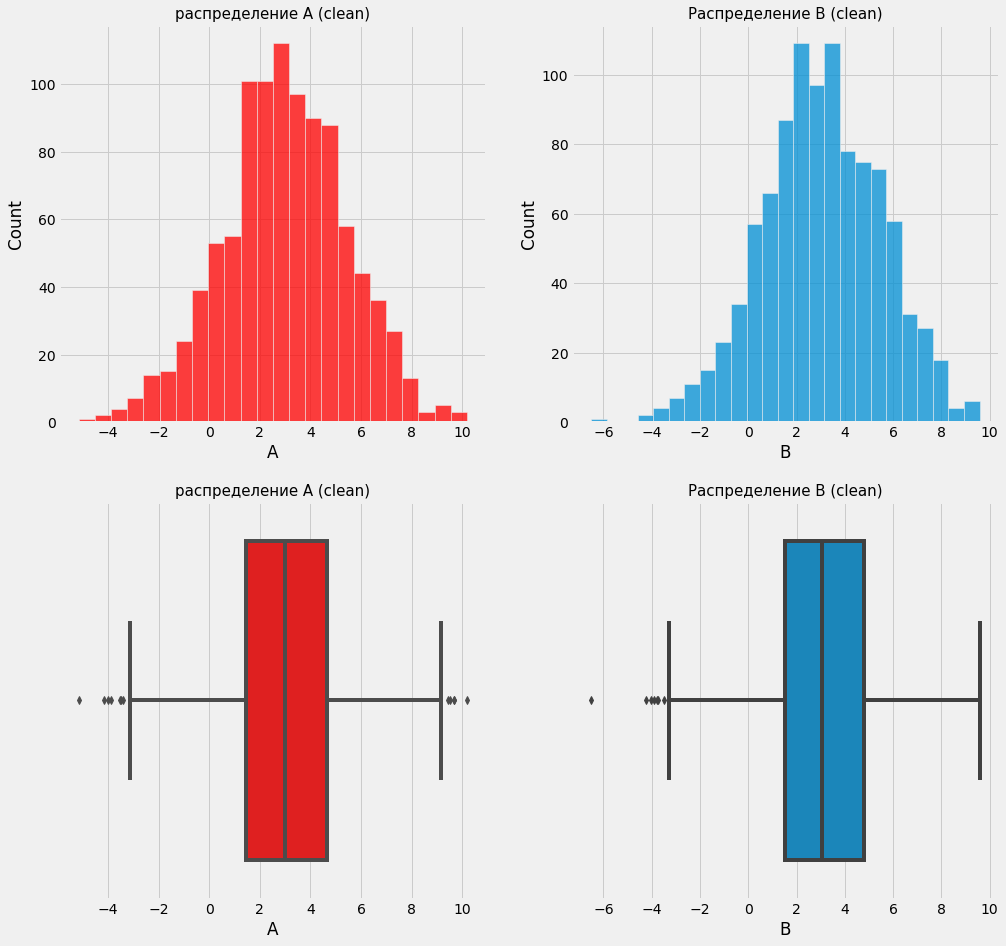

In [15]:
# Посмотрим на распределения столбцов
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

# Выводим Гистограмму
# столбец А
sns.histplot(df_trimmed2.A, ax=ax[0,0], color='red')
ax[0,0].set_title('распределение A (clean)', size=15)

# Столбец B
sns.histplot(df_trimmed2.B, ax=ax[0,1])
ax[0,1].set_title('Распределение B (clean)', size=15)

# Выводим боксплот
sns.boxplot(df_trimmed2.A, ax=ax[1,0], color='red')
ax[1,0].set_title('распределение A (clean)', size=15)

# Столбец B
sns.boxplot(df_trimmed2.B, ax=ax[1,1])
ax[1,1].set_title('Распределение B (clean)', size=15)

### Задание 5 Разобрать пример с мультиколинеарностью 

Мультиколлинеарность - это условие когда одна предсказательная переменная может быть выражена как линейная комбинация других

### Пример

In [19]:
# Сгенерируем датафрейм
df_ex=pd.DataFrame(np.random.rand(1000, 4), columns=list('ABCD'))
df_ex

,A,B,C,D
0,0.009110,0.949713,0.662117,0.399193
1,0.087032,0.843266,0.501570,0.539102
2,0.584836,0.400529,0.811799,0.356570
3,0.880657,0.623991,0.069402,0.877748
4,0.624858,0.531020,0.247530,0.286252
...,...,...,...,...
995,0.937575,0.502854,0.766795,0.951548
996,0.014697,0.059563,0.411563,0.209806
997,0.133207,0.839608,0.572799,0.579824
998,0.240146,0.413602,0.949450,0.378557


In [28]:
# Добавим столбцы У и F выразим их через линейную функцию y = kx + b

df_ex['E'] = df_ex['A'] * 2
df_ex['F'] = df_ex['C'] * 3

In [30]:
df_ex

,A,B,C,D,E
0,0.009110,0.949713,0.662117,0.399193,0.018220
1,0.087032,0.843266,0.501570,0.539102,0.174063
2,0.584836,0.400529,0.811799,0.356570,1.169671
3,0.880657,0.623991,0.069402,0.877748,1.761315
4,0.624858,0.531020,0.247530,0.286252,1.249716
...,...,...,...,...,...
995,0.937575,0.502854,0.766795,0.951548,1.875150
996,0.014697,0.059563,0.411563,0.209806,0.029394
997,0.133207,0.839608,0.572799,0.579824,0.266415
998,0.240146,0.413602,0.949450,0.378557,0.480292


In [33]:
# Проверим корелляцию
df_ex.corr()

,A,B,C,D,E
A,1.000000,-0.032767,-0.020082,0.005146,1.000000
B,-0.032767,1.000000,0.011018,-0.045524,-0.032767
C,-0.020082,0.011018,1.000000,-0.008025,-0.020082
D,0.005146,-0.045524,-0.008025,1.000000,0.005146
E,1.000000,-0.032767,-0.020082,0.005146,1.000000


<AxesSubplot:>

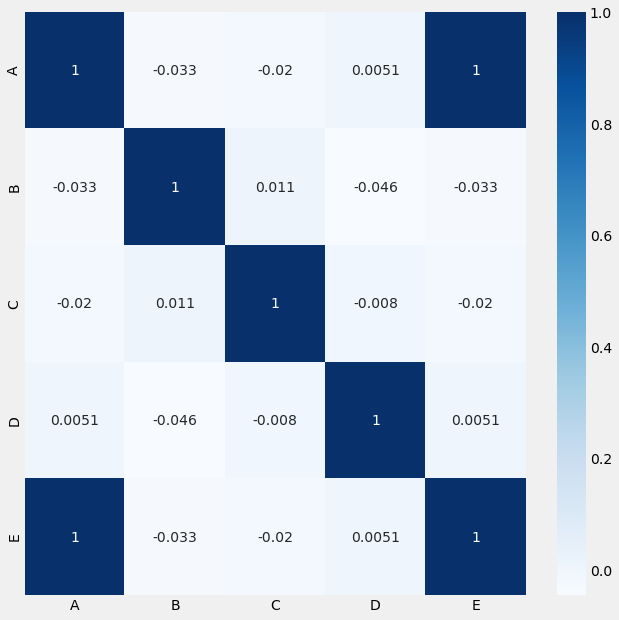

In [34]:
# Построим корялляционную матрицу
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_ex.corr(),annot=True,cmap='Blues')

### Удаление корелированных признаков

In [36]:
# Удалим сильнокорелированные признаки
def trimm_correlated(df_in, threshold):
    '''Функция, которая удяляет из датасета корелированные признаки. threshold - это 
    предельное значение кореляции. '''
    df_corr = df_in.corr()
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [37]:
df_clean_corr = trimm_correlated(df_ex, threshold=0.95)

In [38]:
df_clean_corr

,A,B,C,D
0,0.009110,0.949713,0.662117,0.399193
1,0.087032,0.843266,0.501570,0.539102
2,0.584836,0.400529,0.811799,0.356570
3,0.880657,0.623991,0.069402,0.877748
4,0.624858,0.531020,0.247530,0.286252
...,...,...,...,...
995,0.937575,0.502854,0.766795,0.951548
996,0.014697,0.059563,0.411563,0.209806
997,0.133207,0.839608,0.572799,0.579824
998,0.240146,0.413602,0.949450,0.378557


In [ ]:
!